In [5]:
#Librerías estándar
import math
import random

#Básicas que se usan siempre
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FixedLocator
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoLocator


#Machine learning & IA
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

class DataScaler:
    def __init__(self,x,y,scaler=StandardScaler):
        self.x=x
        self.y=y
        self.scaler=scaler

        if (np.ndim(x)==1):
            self.x_ndim=1
        else:
            self.x_ndim=x.shape[1]
    

        if (np.ndim(y)==1):
            self.y_ndim=1
        else:
            self.y_ndim=y.shape[1]


    def get_datos_escalados(self):
        self.x_scaler = self.scaler()
        self.y_scaler = self.scaler()

        x_scaled = self.x_scaler.fit_transform(self.x.reshape(-1,self.x_ndim))
        y_scaled=self.y_scaler.fit_transform(self.y.reshape(-1,self.y_ndim))

        return x_scaled,y_scaled

    def get_datos_reales(self):
        return self.x,self.y
    
    def predict(self,model,x_pred):
        y_pred=self.y_scaler.inverse_transform(model.predict(self.x_scaler.transform(x_pred.reshape(-1,self.x_ndim))))
        return y_pred


def axes_configure_labels(axes,title,xlabel,ylabel):
    color="#003B80"
    facecolor="#FAFCFF"
    gridcolor="#BAD4F2"
    tickcolor="#011E32"
    fontsize_label=13
 
    axes.set_xlabel(xlabel, fontsize=fontsize_label,color=color)
    axes.set_ylabel(ylabel, fontsize=fontsize_label,color=color)
    axes.set_title(title,color=color)
 
    axes.set_facecolor(facecolor)
    axes.spines['bottom'].set_color(tickcolor)
    axes.spines['top'].set_color(tickcolor)
    axes.spines['right'].set_color(tickcolor)
    axes.spines['left'].set_color(tickcolor)
    axes.tick_params(axis='both', colors=tickcolor)
 
    axes.grid(visible=True, which='major', axis='both',color=gridcolor,linewidth=1,zorder=-10)
    axes.set_axisbelow(True)
 
    handles, labels = axes.get_legend_handles_labels()
    if labels:
        axes.legend(fontsize=fontsize_label-2,labelcolor=color)


def compile_fit(capas,activation,last_activation,loss,optimizer,epochs,x_train,y_train,metrics=[]):

    input_dim=1

    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)
   
    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation=activation,input_dim=input_dim))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation=last_activation))          
        else:
            model.add(Dense(neuronas_capa, activation=activation))

    model.compile(loss=loss,optimizer=optimizer,metrics=metrics)
   
    history=model.fit(x_train,y_train,epochs=epochs,verbose=False)

    return history,model


def plot_metrics(axes,history,title):
    for metric in history.history.keys():
        if (metric!="loss"):
            axes.plot(history.history[metric],label=f"{metric}={history.history[metric][-1]:.2f}")

    axes_configure_labels(axes,title,"Épocas","Métricas")
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    #axes.set_ylim(ymin=0,ymax=1.1) 



2025-02-03 18:04:59.898411: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-03 18:05:00.586044: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
def get_datos_pib_educacion(dispersion):
    np.random.seed(10)

    w = 1.6
    b = 50

    x = np.random.uniform(0, 100, 20) 
    ruido = np.random.normal(loc=0, scale=dispersion, size=x.shape)
    y = w * x + b + ruido

    return x,y


x,y=get_datos_pib_educacion(20)
dataScaler=DataScaler(x,y)

x_scaled,y_scaled=dataScaler.get_datos_escalados()

capas=[1]
activation="linear"
last_activation="linear"
loss="mse"
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
epochs=50
metrics=["mse","mae",tf.keras.metrics.R2Score(),tf.keras.metrics.FBetaScore(beta=2.0)]

history,model=compile_fit(capas,activation,last_activation,loss,optimizer,epochs,x_scaled,y_scaled,metrics)



/home/logongas/Documentos/desarrollo/python_default_env/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Coeficiente de intersección (b0): [51.79466077]
Coeficiente de pendiente (b1): [[1.62938441]]


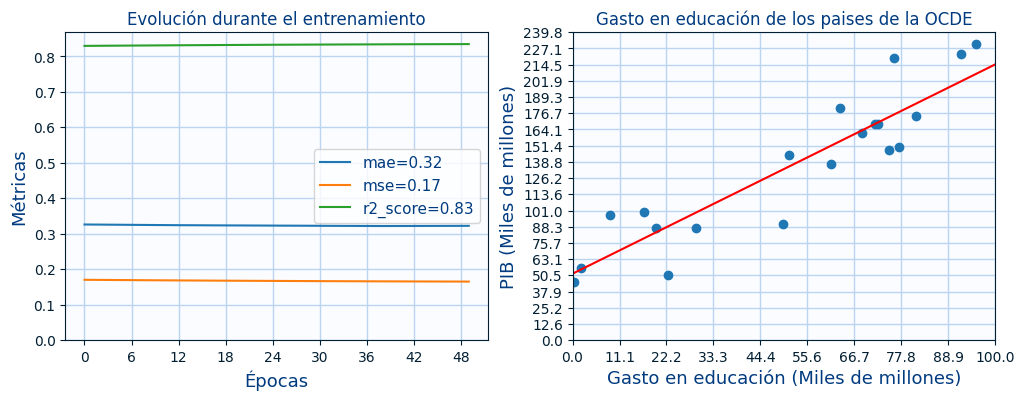

In [126]:
figure=plt.figure(figsize = (12, 4))

axes = figure.add_subplot(1,2,1)
plot_metrics(axes,history,"Evolución durante el entrenamiento")
axes.set_ylim(ymin=0)

axes = figure.add_subplot(1,2,2)
x_pred=np.linspace(0,100,200)
y_pred=dataScaler.predict(model,x_pred)
axes.scatter(x,y)
axes.plot(x_pred,y_pred,color="#ff0000")
axes_configure_labels(axes,"Gasto en educación de los paises de la OCDE","Gasto en educación (Miles de millones)","PIB (Miles de millones)")
axes.set_xlim(xmin=0,xmax=100)
axes.set_ylim(ymin=0)
axes.xaxis.set_major_locator(LinearLocator(10))
axes.yaxis.set_major_locator(LinearLocator(20))


model_linear = LinearRegression()
model_linear.fit(x_pred.reshape(-1,1),y_pred.reshape(-1,1))
b0 = model_linear.intercept_
b1 = model_linear.coef_

print(f"Coeficiente de intersección (b0): {b0}")
print(f"Coeficiente de pendiente (b1): {b1}")

In [10]:
print(history.history.keys())

dict_keys(['fbeta_score', 'loss', 'mae', 'mse', 'r2_score'])


In [16]:
def f_score(beta,s,p):
    fbetascore=((beta**2+1)*p*s)/(beta**2*p+s)
    print(f"sensibilidad={s} precisión={p} beta={beta}  f-beta-score={fbetascore:.2f}")
    return fbetascore

In [19]:
(f_score(2,0.2,0.6))
(f_score(2,0.6,0.2))

(f_score(0.5,0.2,0.6))
(f_score(0.5,0.6,0.2))

(f_score(1,0.2,0.6))
(f_score(1,0.6,0.2))

sensibilidad=0.2 precisión=0.6 beta=2  f-beta-score=0.23
sensibilidad=0.6 precisión=0.2 beta=2  f-beta-score=0.43
sensibilidad=0.2 precisión=0.6 beta=0.5  f-beta-score=0.43
sensibilidad=0.6 precisión=0.2 beta=0.5  f-beta-score=0.23
sensibilidad=0.2 precisión=0.6 beta=1  f-beta-score=0.30
sensibilidad=0.6 precisión=0.2 beta=1  f-beta-score=0.30


0.3